In [96]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [98]:
df = pd.read_csv('sentiment_analysis.csv')

In [100]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [104]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [106]:
df.columns

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

In [108]:
text_df = df.drop(['Year', 'Month', 'Day',], axis=1)
text_df.head()

,Time of Tweet,text,sentiment,Platform
0,morning,What a great day!!! Looks like dream.,positive,Twitter
1,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,night,Don't angry me,negative,Facebook
3,morning,We attend in the class just for listening teac...,negative,Facebook
4,noon,"Those who want to go, let them go",negative,Instagram


In [110]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")


What a great day!!! Looks like dream. 

I feel sorry, I miss you here in the sea beach 

Don't angry me 

We attend in the class just for listening teachers reading on slide. Just Nonsence   



In [112]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time of Tweet  499 non-null    object
 1   text           499 non-null    object
 2   sentiment      499 non-null    object
 3   Platform       499 non-null    object
dtypes: object(4)
memory usage: 15.7+ KB


In [114]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [116]:
text_df.text = text_df['text'].apply(data_processing)

In [118]:
text_df = text_df.drop_duplicates('text')

In [120]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [122]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [124]:
text_df.head()

,Time of Tweet,text,sentiment,Platform
0,morning,great day looks like dream,positive,Twitter
1,noon,feel sorry miss sea beach,positive,Facebook
2,night,dont angry,negative,Facebook
3,morning,attend class listening teachers reading slide ...,negative,Facebook
4,noon,want go let go,negative,Instagram


In [126]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

great day looks like dream 

feel sorry miss sea beach 

dont angry 

attend class listening teachers reading slide nonsence 

want go let go 



In [128]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 498
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time of Tweet  391 non-null    object
 1   text           391 non-null    object
 2   sentiment      391 non-null    object
 3   Platform       391 non-null    object
dtypes: object(4)
memory usage: 15.3+ KB


In [130]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [132]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [134]:
text_df.head(10)

,Time of Tweet,text,sentiment,Platform,polarity
0,morning,great day looks like dream,positive,Twitter,0.800
1,noon,feel sorry miss sea beach,positive,Facebook,-0.500
2,night,dont angry,negative,Facebook,-0.500
3,morning,attend class listening teachers reading slide ...,negative,Facebook,0.000
4,noon,want go let go,negative,Instagram,0.000
5,night,night 2 feeling neutral,neutral,Facebook,0.000
6,morning,2 feedings baby fun smiles coos,positive,Facebook,0.300
7,noon,soooo high,neutral,Instagram,0.160
8,night,,neutral,Twitter,0.000
9,morning,today first time arrive boat amazing journey,positive,Facebook,0.425


In [136]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [138]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [140]:
text_df.head()

,Time of Tweet,text,sentiment,Platform,polarity
0,morning,great day looks like dream,Positive,Twitter,0.8
1,noon,feel sorry miss sea beach,Negative,Facebook,-0.5
2,night,dont angry,Negative,Facebook,-0.5
3,morning,attend class listening teachers reading slide ...,Neutral,Facebook,0.0
4,noon,want go let go,Neutral,Instagram,0.0


<Axes: xlabel='sentiment', ylabel='count'>

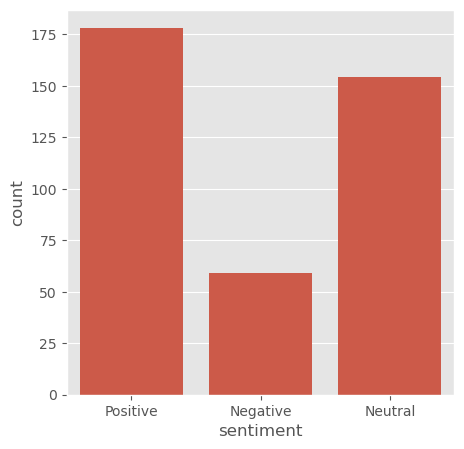

In [142]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

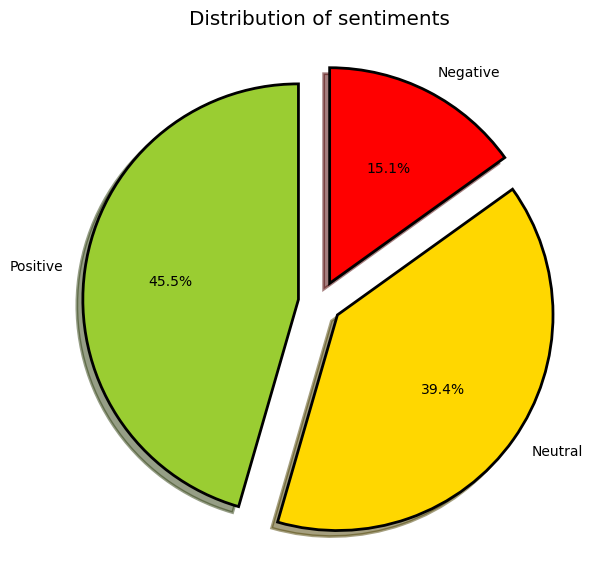

In [144]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [146]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Time of Tweet,text,sentiment,Platform,polarity
481,noon,kiss feet people kick anything want morning ev...,Positive,Instagram,1.0
434,night,httptwitpiccom4wukt bought ludi rug dogs best,Positive,Facebook,1.0
436,noon,loves mum much happy mothers day wonderful mot...,Positive,Twitter,0.9
0,morning,great day looks like dream,Positive,Twitter,0.8
31,noon,buy sophies world book im really happy,Positive,Twitter,0.8


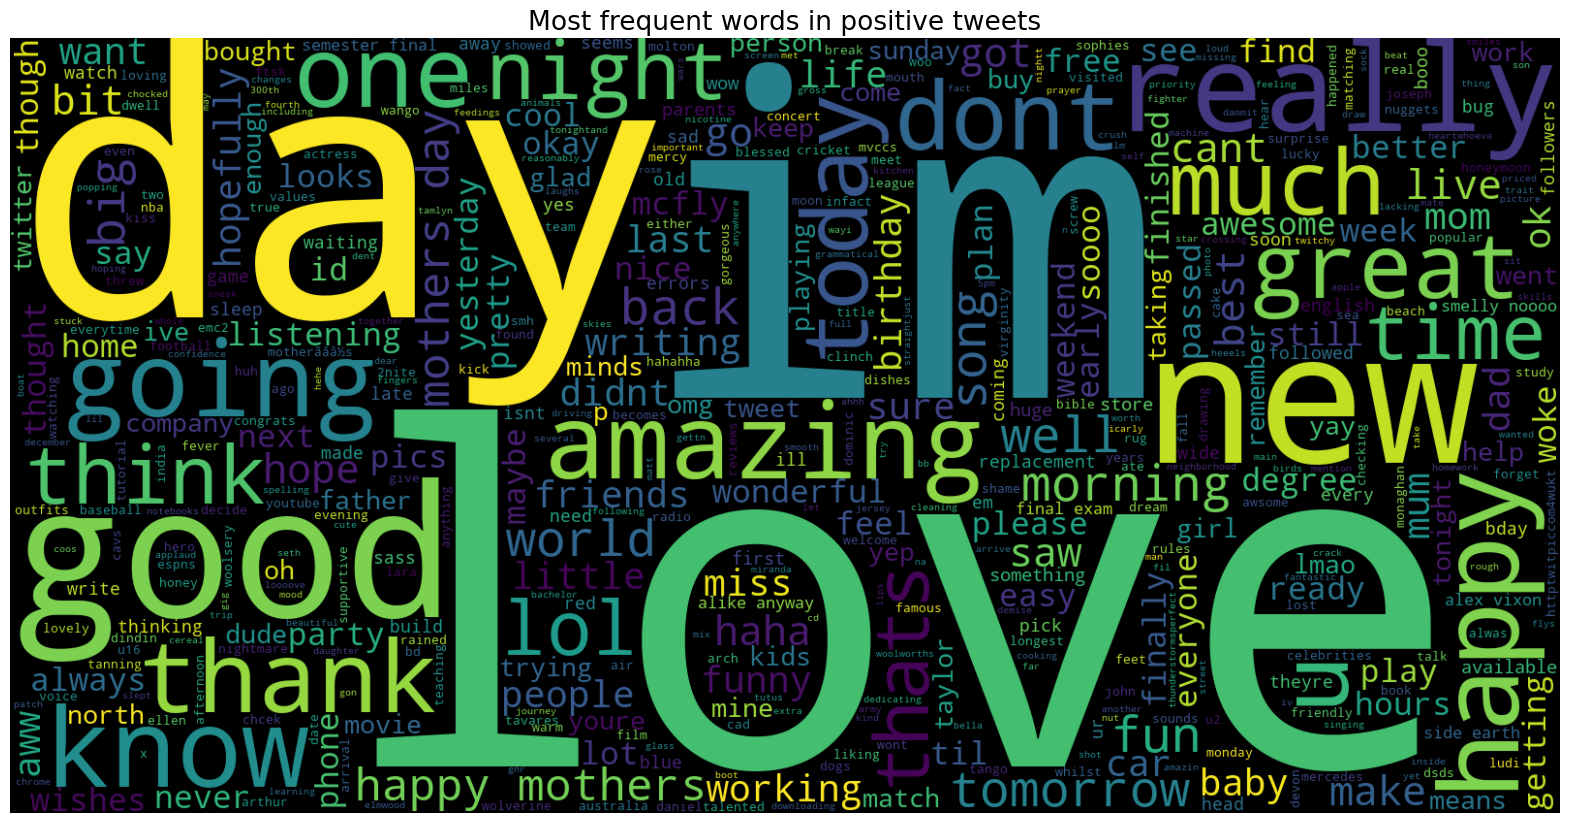

In [148]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [149]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Time of Tweet,text,sentiment,Platform,polarity
426,morning,im hunrgy right heels kill hardly walk,Negative,Instagram,-0.002976
307,noon,live thats want better bound bad eggs though s...,Negative,Twitter,-0.021212
477,morning,son got stung bug first time little finger sli...,Negative,Twitter,-0.034722
412,noon,_x_atl u mean jack barakats wow u ever gone ho...,Negative,Instagram,-0.047917
359,night,spending saturday morning taking notes researc...,Negative,Instagram,-0.050000


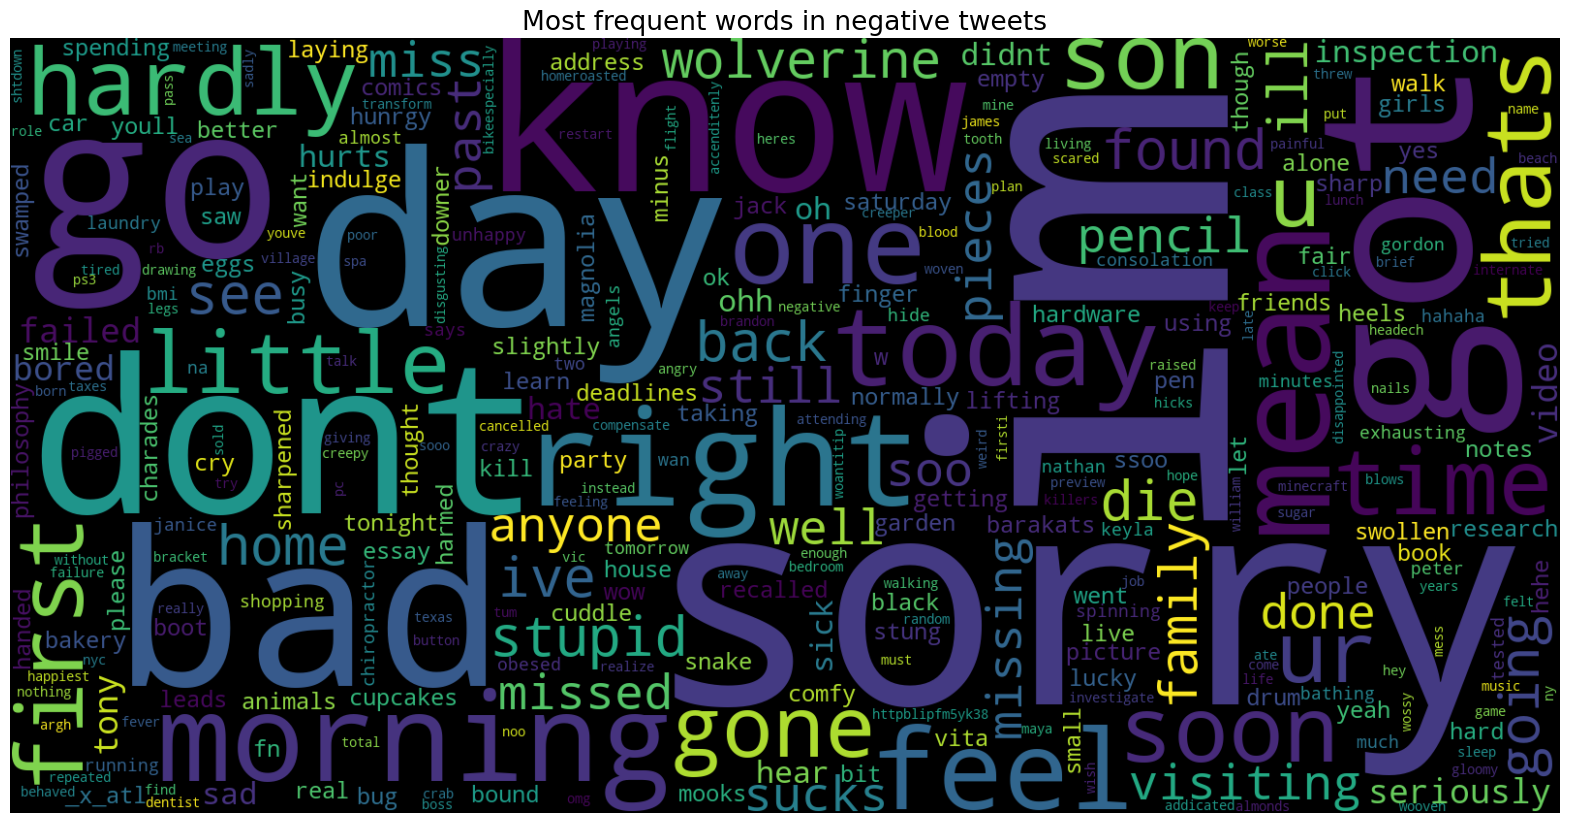

In [150]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [151]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Time of Tweet,text,sentiment,Platform,polarity
3,morning,attend class listening teachers reading slide ...,Neutral,Facebook,0.0
374,night,cant wait see boy tomorrow,Neutral,Twitter,0.0
355,noon,ohoh missed ur tweets im gon na stay awake nig...,Neutral,Twitter,0.0
357,morning,boss shes moving nyc,Neutral,Facebook,0.0
361,noon,looking forward gig ireland see ya,Neutral,Twitter,0.0


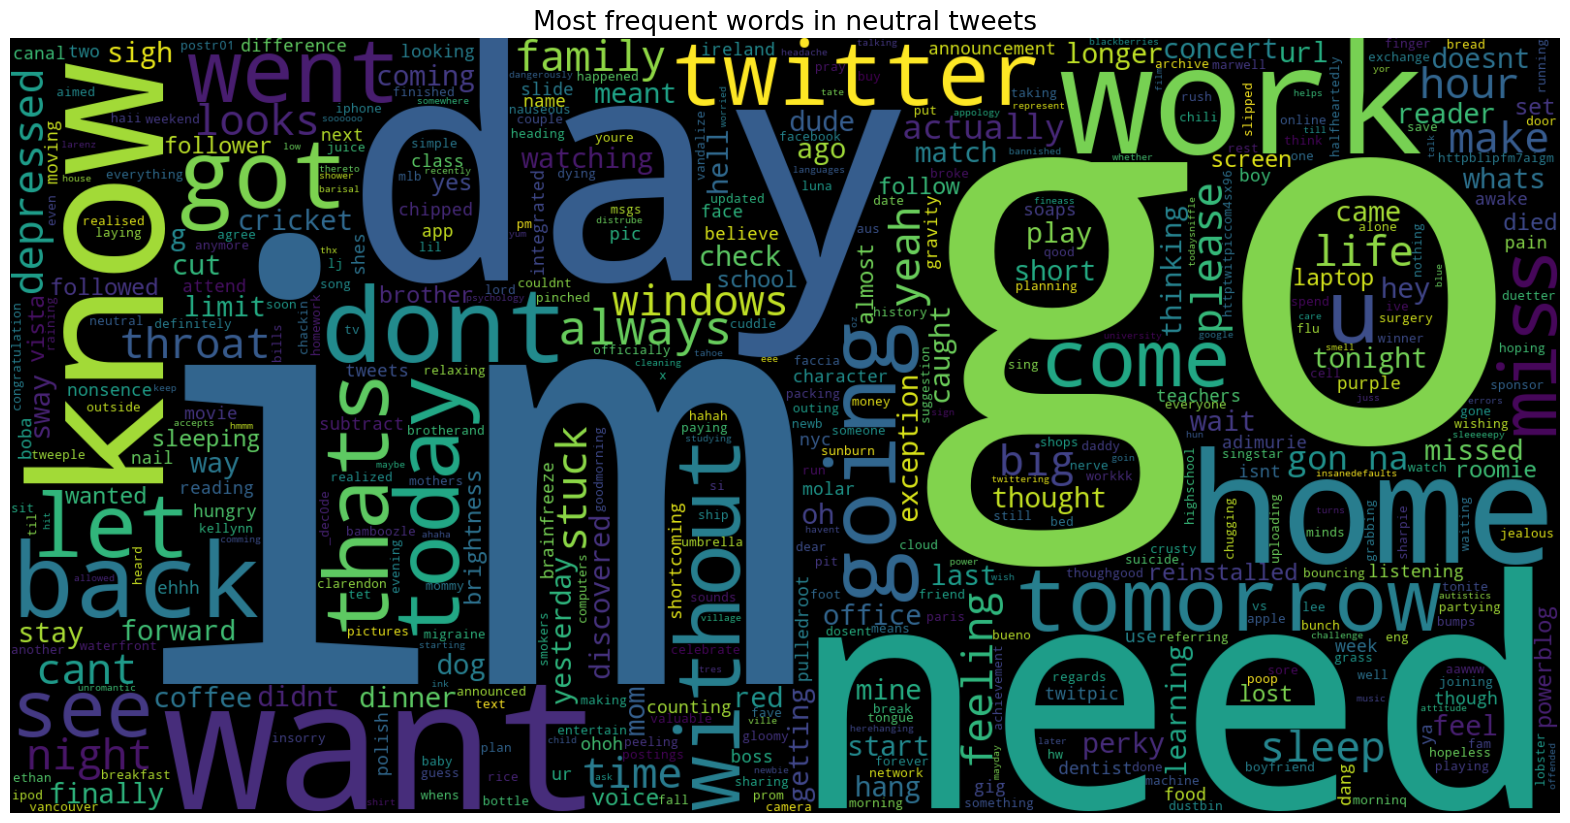

In [152]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [71]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [162]:
feature_names = vect.get_feature_names_out()  # Use get_feature_names_out() for scikit-learn >= 1.0

print("Number of features: {}\n".format(len(feature_names)))
print("Feature names (first 20):\n{}".format(feature_names[:20]))

Number of features: 3314

Feature names (first 20):
['10' '10 minutes' '10 years' '100' '100 brightness' '1130' '1130 wait'
 '140' '140 character' '15' '15 mins' '1750' '1750 go' '19' '19 days' '21'
 '21 ethan' '21 flys' '25' '25 december']


In [164]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [166]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [168]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (312, 3314)
Size of y_train: (312,)
Size of x_test: (79, 3314)
Size of y_test: (79,)


In [170]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 58.23%


In [174]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 3 10  0]
 [ 0 26  1]
 [ 0 22 17]]


              precision    recall  f1-score   support

    Negative       1.00      0.23      0.38        13
     Neutral       0.45      0.96      0.61        27
    Positive       0.94      0.44      0.60        39

    accuracy                           0.58        79
   macro avg       0.80      0.54      0.53        79
weighted avg       0.78      0.58      0.57        79



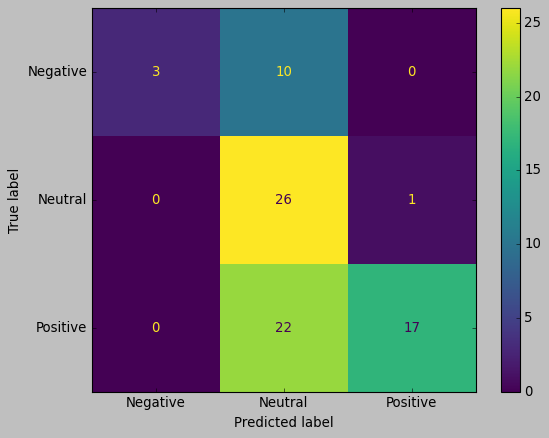

In [176]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [178]:
from sklearn.model_selection import GridSearchCV

In [180]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [182]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.1}


In [184]:
y_pred = grid.predict(x_test)

In [186]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 60.76%


In [190]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 2 11  0]
 [ 0 26  1]
 [ 0 19 20]]


              precision    recall  f1-score   support

    Negative       1.00      0.15      0.27        13
     Neutral       0.46      0.96      0.63        27
    Positive       0.95      0.51      0.67        39

    accuracy                           0.61        79
   macro avg       0.81      0.54      0.52        79
weighted avg       0.79      0.61      0.59        79



In [192]:
from sklearn.svm import LinearSVC

In [194]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [196]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 60.76%


In [198]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 3 10  0]
 [ 0 26  1]
 [ 0 20 19]]


              precision    recall  f1-score   support

    Negative       1.00      0.23      0.38        13
     Neutral       0.46      0.96      0.63        27
    Positive       0.95      0.49      0.64        39

    accuracy                           0.61        79
   macro avg       0.80      0.56      0.55        79
weighted avg       0.79      0.61      0.59        79



In [200]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [202]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [204]:
y_pred = grid.predict(x_test)

In [206]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 60.76%


In [208]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3 10  0]
 [ 0 26  1]
 [ 0 20 19]]


              precision    recall  f1-score   support

    Negative       1.00      0.23      0.38        13
     Neutral       0.46      0.96      0.63        27
    Positive       0.95      0.49      0.64        39

    accuracy                           0.61        79
   macro avg       0.80      0.56      0.55        79
weighted avg       0.79      0.61      0.59        79



Additional code to extract data form twitter using twitter api

In [213]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [215]:
# Importing the keys from twitter api
consumerKey = "xxxxxxxxxxxxxxxxxxxx"
consumerSecret = "xxxxxxxxxxxxxxxxxxxx"
accessToken = "xxxxxxxxxxxxxxxxxxxx"
accessTokenSecret = "xxxxxxxxxxxxxxxxxxxx"

In [217]:
# Establish the connection with twitter API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
# Get no of tweets and searched term together 
tweets = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms)